In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_field = "xray_native_5_0+xray_native_5_1"
# field = "xray_native_5_0+xray_native_5_1"
field = "rmsd"

volume_df = pd.read_csv("../../data/analysis/277_native_5_ref/volume_{}.csv".format(file_field), index_col=0)
print(len(volume_df))
volume_df.head()

1000


,n,xray_native_5_0+xray_native_5_1_mean,xray_native_5_0+xray_native_5_1_std,ff_mean,ff_std,rmsd_mean,rmsd_std,xray_native_5_0+xray_native_5_1_50,xray_native_5_0+xray_native_5_1_25,xray_native_5_0+xray_native_5_1_75,ff_50,ff_25,ff_75,rmsd_50,rmsd_25,rmsd_75
0,1,9.574126,0.334841,20233.604103,5266.694191,NaN,NaN,9.586045,9.340427,9.821589,19138.712529,16438.014120,23051.614885,NaN,NaN,NaN
1,2,9.367080,0.284532,19183.913168,5328.898849,NaN,NaN,9.387493,9.162251,9.570117,18325.345570,15672.158502,21104.903350,NaN,NaN,NaN
2,3,9.281339,0.255135,18980.832765,5514.677748,NaN,NaN,9.274445,9.089870,9.465491,17965.485707,15073.268046,21135.492432,NaN,NaN,NaN
3,4,9.215375,0.236408,18688.262984,5565.630142,NaN,NaN,9.206529,9.037528,9.396910,17492.531824,14805.399905,21129.606305,NaN,NaN,NaN
4,5,9.155780,0.214826,18276.643995,5492.301720,NaN,NaN,9.152078,8.986495,9.294285,16950.650290,14456.546555,20496.244337,NaN,NaN,NaN


In [13]:
natives_df = pd.read_csv("../../../dev/45_synthetic_native_4/data/csvs/natives_5.csv", index_col=0)
natives_df["xray_native_5_0+xray_native_5_1"] = natives_df["xray_native_5_0"] + natives_df["xray_native_5_1"]
natives_df["rmsd"] = natives_df["rmsd_native_5_0"] + natives_df["rmsd_native_5_1"]
natives_df.head()

,pdb,cif_0,cif_1,w_0_0,w_0_1,w_1_0,w_1_1,xray_native_5_0,r_free_native_5_0,r_work_native_5_0,rmsd_native_5_0,ff,xray_native_5_1,r_free_native_5_1,r_work_native_5_1,rmsd_native_5_1,xray_native_5_0+xray_native_5_1,rmsd
0,/Users/matthew/Documents/xray/dev/45_synthetic...,/Users/matthew/Documents/xray/dev/45_synthetic...,/Users/matthew/Documents/xray/dev/45_synthetic...,0.8,0.3,0.2,0.7,3.663088,0.040646,0.042554,NaN,18612.159295,3.68133,0.051665,0.042286,NaN,7.344418,NaN


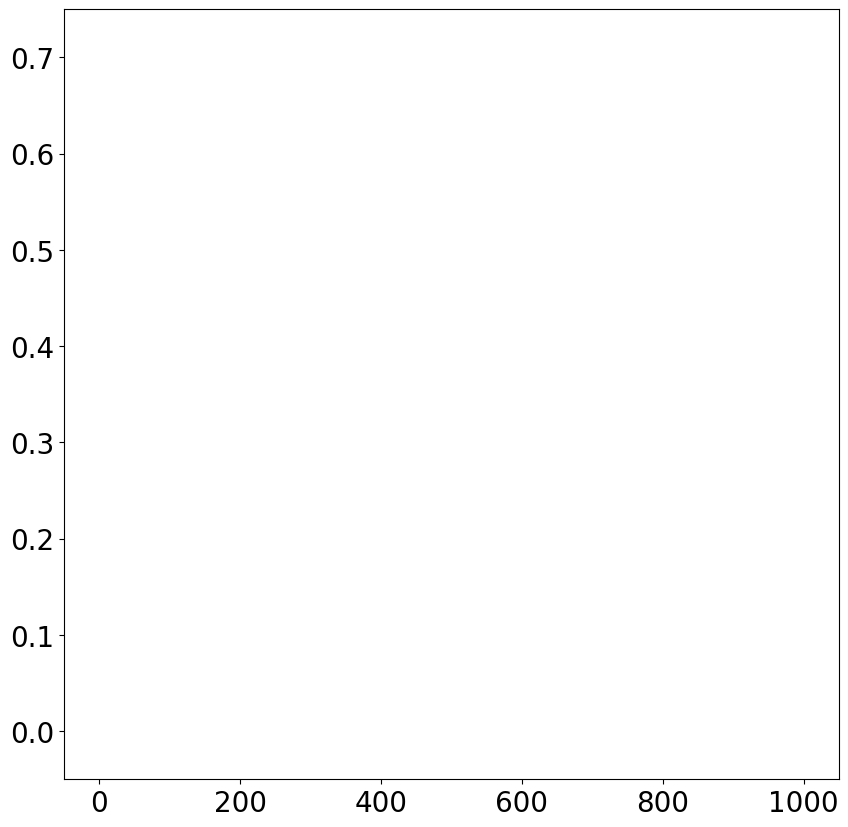

In [14]:
plt.figure(figsize=(10,10))

x = list(range(len(volume_df)))
y = volume_df["{}_mean".format(field)]

# err = [y - volume_df["{}_25".format(field)], volume_df["{}_75".format(field)] - y]
err = [volume_df["{}_std".format(field)], volume_df["{}_std".format(field)]]

space = 15
plt.errorbar(x[::space], y[::space], [err[0][::space], err[1][::space]], linestyle='None', marker='o', capsize=2, c="black")

plt.plot([-1000, 2000], [natives_df[field], natives_df[field]], c="black")
plt.xlim(-50,1050)

if field == "rmsd":
    plt.ylim(-0.05, 0.75)

plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust the size as needed

plt.xlabel(None)
plt.ylabel(None)

plt.savefig(Path(Path.home(), "Desktop/volume.png"))